In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sys
sys.path.append("../scripts")

import preprocessing as dp
import data_extraction as de

In [2]:
df = de.load_data('../data/csv.csv')

Data Loaded Successfully


In [3]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,3/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
1,145249,12827,5/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
2,145249,12827,7/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
3,145255,12827,5/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0
4,145255,12827,7/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0


In [4]:
df.shape

(1000098, 52)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
# Provides unique value in every single colummn
# Useful in Identifying columns that have the same value entirely and columns that don't have any unique values
# This columns dosn't offer any significant information to the analysis. 
df.nunique()

UnderwrittenCoverID         116532
PolicyID                      7000
TransactionMonth                23
IsVATRegistered                  2
Citizenship                      4
LegalType                        6
Title                            5
Language                         1
Bank                            11
AccountType                      3
MaritalStatus                    3
Gender                           3
Country                          1
Province                         9
PostalCode                     888
MainCrestaZone                  16
SubCrestaZone                   45
ItemType                         1
mmcode                         427
VehicleType                      5
RegistrationYear                25
make                            46
Model                          411
Cylinders                        7
cubiccapacity                  122
kilowatts                       82
bodytype                        13
NumberOfDoors                    6
VehicleIntroDate    

In [7]:
## Intialize The Datapreproccessing class
dp = dp.DataPreprocessing(df)

In [8]:
# Change the TranscationMonth and VehicleIntroDate column to datetime data type
dp.to_datetime()

d:\Personal Files\KIAM Notebooks\KIAM Week3\notebooks\../scripts\preprocessing.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['VehicleIntroDate'] = pd.to_datetime(self.data['VehicleIntroDate'], errors='coerce')


In [9]:
# Drop columns that are not necessary for the analysis
dp.drop_columns()

In [30]:
# There are no duplicated values
df.duplicated().sum()

np.int64(1171)

In [11]:
df.isna().sum()

UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
MaritalStatus                 8259
Gender                        9536
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
VehicleType                    552
RegistrationYear                 0
make                           552
bodytype                       552
NumberOfDoors                  552
AlarmImmobiliser                 0
TrackingDevice                   0
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
SumInsured                       0
TermFrequency                    0
CalculatedPremiumPerTerm         0
ExcessSelected                   0
CoverCategory                    0
CoverType           

In [12]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'MaritalStatus',
       'Gender', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone',
       'VehicleType', 'RegistrationYear', 'make', 'bodytype', 'NumberOfDoors',
       'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [13]:
threshold = 0.6
columns_to_drop = []
for col in df.columns:
    if df[col].isnull().sum()/len(df) >= threshold:
        columns_to_drop.append(col)
print(columns_to_drop)
df.drop(columns=columns_to_drop, inplace=True)

['WrittenOff', 'Rebuilt', 'Converted']


In [14]:
df.shape

(1000098, 31)

In [15]:
df.isna().sum()

UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
MaritalStatus                 8259
Gender                        9536
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
VehicleType                    552
RegistrationYear                 0
make                           552
bodytype                       552
NumberOfDoors                  552
AlarmImmobiliser                 0
TrackingDevice                   0
NewVehicle                  153295
SumInsured                       0
TermFrequency                    0
CalculatedPremiumPerTerm         0
ExcessSelected                   0
CoverCategory                    0
CoverType                        0
CoverGroup                       0
Section                          0
Product             

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
MaritalStatus               0
Gender                      0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
VehicleType                 0
RegistrationYear            0
make                        0
bodytype                    0
NumberOfDoors               0
AlarmImmobiliser            0
TrackingDevice              0
NewVehicle                  0
SumInsured                  0
TermFrequency               0
CalculatedPremiumPerTerm    0
ExcessSelected              0
CoverCategory               0
CoverType                   0
CoverGroup                  0
Section                     0
Product                     0
TotalPremium                0
TotalClaims                 0
dtype: int64

In [18]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,MaritalStatus,Gender,Province,PostalCode,...,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0
1,145249,12827,2015-05-01,True,,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0
2,145249,12827,2015-07-01,True,,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0
3,145255,12827,2015-05-01,True,,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,512.848070,0
4,145255,12827,2015-07-01,True,,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0


In [19]:
df.shape

(837995, 31)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837995 entries, 0 to 1000097
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   UnderwrittenCoverID       837995 non-null  int64         
 1   PolicyID                  837995 non-null  int64         
 2   TransactionMonth          837995 non-null  datetime64[ns]
 3   IsVATRegistered           837995 non-null  bool          
 4   Citizenship               837995 non-null  object        
 5   LegalType                 837995 non-null  object        
 6   MaritalStatus             837995 non-null  object        
 7   Gender                    837995 non-null  object        
 8   Province                  837995 non-null  object        
 9   PostalCode                837995 non-null  int64         
 10  MainCrestaZone            837995 non-null  object        
 11  SubCrestaZone             837995 non-null  object        
 12  Vehicl

In [21]:
df['CoverType'].unique()

array(['Windscreen', 'Own Damage', 'Third Party', 'Passenger Liability',
       'Signage and Vehicle Wraps', 'Keys and Alarms',
       'Cleaning and Removal of Accident Debris', 'Emergency Charges',
       'Credit Protection', 'Accidental Death', 'Basic Excess Waiver',
       'Income Protector', 'Deposit Cover',
       'Standalone passenger liability', 'Baggage/Luggage',
       'Asset Value Preserver', 'Cash Takings', 'Third Party Only',
       'Trailer', 'Fire and Theft', 'Roadside Assistance',
       'Factory Fitted Sound and Other Electronic Equipment'],
      dtype=object)

In [22]:
df['Product'].unique()

array(['Mobility Metered Taxis: Monthly',
       'Mobility Commercial Cover: Monthly',
       'Standalone Passenger Liability', 'Bridge Taxi Finance: Monthly'],
      dtype=object)

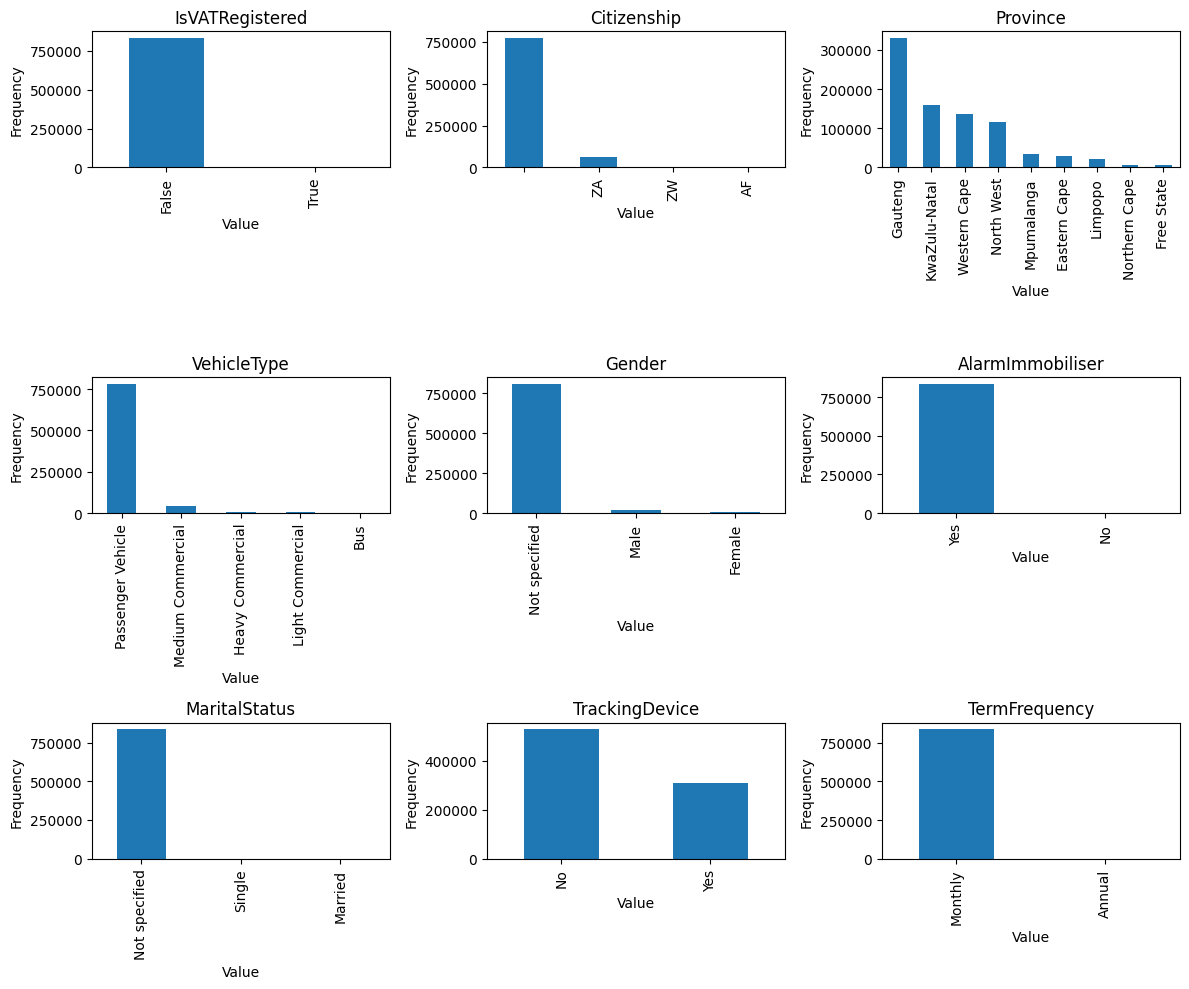

In [23]:
categorical_columns = ['IsVATRegistered','Citizenship','Province','VehicleType','Gender','AlarmImmobiliser','MaritalStatus','TrackingDevice','TermFrequency']

plt.figure(figsize=(12,10))
for i,col in enumerate(categorical_columns):
  plt.subplot(3, 3, i + 1)
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.xlabel('Value')
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

KeyError: 'Cylinders'

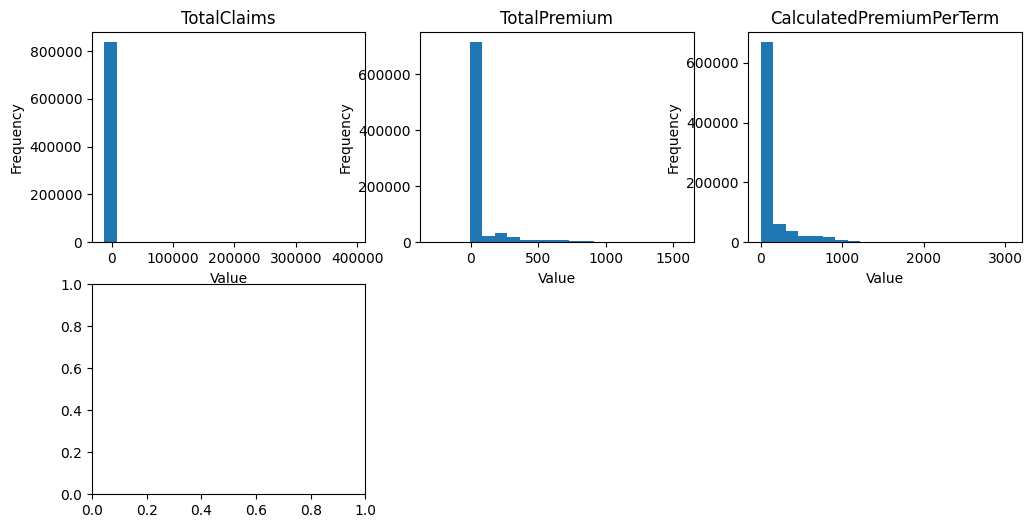

In [24]:
columns = ['TotalClaims','TotalPremium','CalculatedPremiumPerTerm','Cylinders','cubiccapacity','kilowatts']

plt.figure(figsize=(12,6))
for i,col in enumerate(columns):
  plt.subplot(2, 3, i + 1)
  plt.hist(df[col], bins=20)
  plt.title(col)
  plt.xlabel('Value')
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [47]:
corr = df.groupby(['PostalCode','TransactionMonth']).agg({'TotalClaims':'mean','TotalPremium':'mean'}).reset_index()

In [48]:
corr

,PostalCode,TransactionMonth,TotalClaims,TotalPremium
0,1,2013-11-01,843.083333,23.879009
1,1,2013-12-01,0.000000,24.905872
2,1,2014-01-01,0.000000,19.633456
3,1,2014-02-01,0.000000,19.633456
4,1,2014-03-01,0.000000,19.000119
...,...,...,...,...
9680,9870,2015-04-01,0.000000,81.009354
9681,9870,2015-05-01,0.000000,81.009354
9682,9870,2015-06-01,0.000000,81.009354
9683,9870,2015-07-01,0.000000,81.009354


<Axes: xlabel='TotalClaims', ylabel='TotalPremium'>

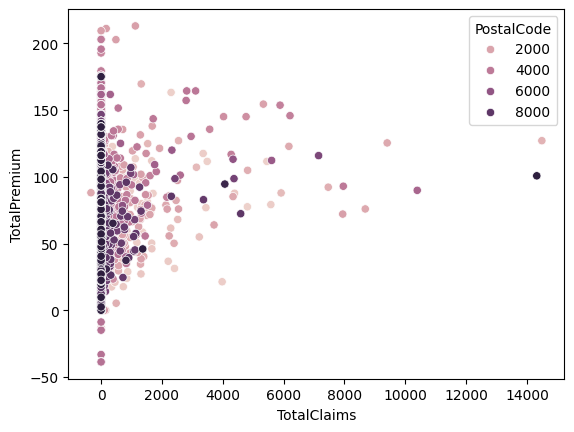

In [49]:
sns.scatterplot(data=corr, x=corr['TotalClaims'],y=corr['TotalPremium'], hue=corr['PostalCode'])

Text(0.5, 1.0, 'Correlation Matrix')

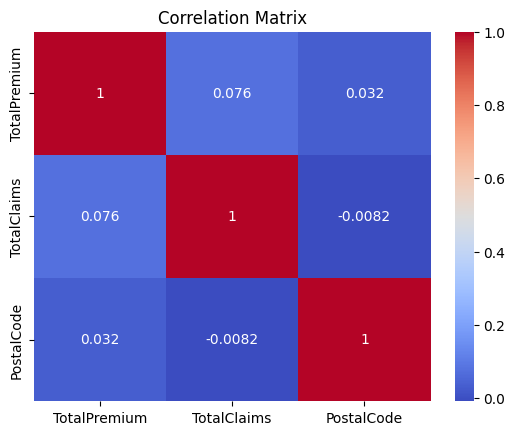

In [ ]:
# Correlation matrix
correlation_matrix = corr[['TotalPremium', 'TotalClaims', 'PostalCode']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

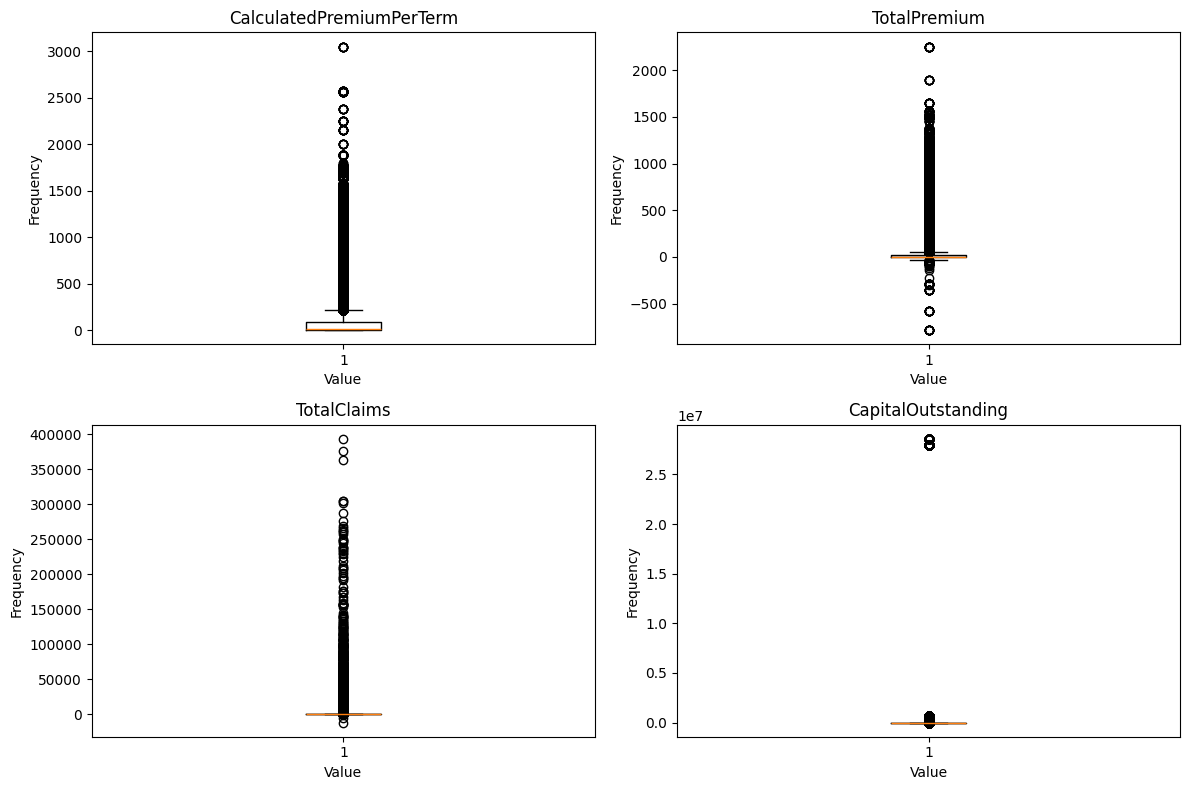

In [ ]:
outlier_columns = ['CalculatedPremiumPerTerm','TotalPremium','TotalClaims','CapitalOutstanding']

plt.figure(figsize=(12,8))
for i,col in enumerate(outlier_columns):
  plt.subplot(2, 2, i + 1)
  plt.boxplot(df[col])
  plt.title(col)
  plt.xlabel('Value')
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()